# Question-4 : Backpropogation

## Explanation for model structure and assumptions 


### Vectorized data :
- The data has been converted to vector form in order to aid computation time 


### Train/Validation Split -
- A ratio of 80:20 is chosen as it is widely considered a good starting point(adhering to pareto principle) and is performs well with the amount of data at hand


### Number of hidden nodes -
- A fair bit of number of nodes were tested with 40 giving the best results

### Activation function : 
- In this implemetation of backpropagation non-linear function activation functions are chosen as chossing a linear function would be resundant as there will be no learning
- For hidden layer sigmoid function is chosen
- For connection between hidden and outplut layer softmax function is chosen
- Justification- 
- Sigmoid function - 

- 1.This function is takes any input value but the output is always between 0 and 1 
- 2. Chooosing sigmoid activation function can result in vanishing/ exploding gradient problem which is addressed in this implementation
- 3. As this is a simple implemetation sigmoid function was chosen over other activation functions like ReLu

- Softmax function - 
- 1.Softmax function converts inputs to values between 0 and 1 with the sum of all elements adding up to 1
- 2. Softmax funcion is considered a standard for classification problems for output layer


### Addressing vanishing gradient problem -
- As we are using sigmoid function , vanishing gradient is a problem which needs to be tackled. For this purpose we use Xavier (Glorot) weight initialization scheme which adds a term to wights to keep them from vanishing/exploding.


### Loss Function :
- Cross entropy has been chosen as the choice of error function and cost as it is one of the most effective for classification problems
- Cross entropy loss is the measure of  difference between discovered and the predicted distribution in a classification problem
- Cross-entropy loss or takes the sum of negative logarithms of likelihood of each scenario

### Importing Libraries

In [1]:
# importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

### Read data from files

In [2]:
# importing features and labels from files
features = pd.read_csv("./train_data.csv", header=None)
labels = pd.read_csv("./train_labels.csv", header=None)

### Dividing data into train and validation sets

In [3]:
# splitting the data into training and validation in the ratio 80:20
split = 0.2
row_x,col_x = features.shape
row_y,col_y = labels.shape
train_data = features.iloc[int(row_x*split):,:]
train_labels = labels.iloc[int(row_y*split):,:]
val_data = features.iloc[0:int(row_x*split),:]
val_labels = labels.iloc[0:int(row_y*split),:]

In [4]:
# displaying the resulting shapes of datasets (train and validation) after split

In [5]:
train_data = np.array(train_data.T)
train_data.shape


(784, 19804)

In [6]:
train_labels = np.array(train_labels.T)
train_labels.shape

(4, 19804)

In [7]:
val_data = np.array(val_data.T)
val_data.shape

(784, 4950)

In [8]:
val_labels = np.array(val_labels.T)
val_labels.shape

(4, 4950)

In [9]:
# Initializing parametes - weights and biases aas well as shuffling them
# initial biases are taken as 0

def define_parameters(inp_nodes, hidden_nodes, out_nodes):
    
    
    initial_Weight1=np.random.randn(hidden_nodes, inp_nodes) * np.sqrt(1/(inp_nodes))
    initial_bias1=np.zeros((hidden_nodes, 1))
    initial_Weight2=np.random.randn(out_nodes, hidden_nodes) * np.sqrt(1/(hidden_nodes))
    initial_bias2=np.zeros((out_nodes, 1))
    
    params = {"Weight1": initial_Weight1,
                "bias1": initial_bias1,
                "Weight2": initial_Weight2,
                "bias2": initial_bias2 }
    
    return params

The issue of vanishing gradient is addressed by using Xavier weight initialization wherein random wights were multiplied by square root of ( 1/ number of input connections to that layer ) 

In [10]:
# activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [11]:
# activation function for output layer
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=0, keepdims=True)

In [12]:
# Function for forward propagation ( containing dot product and activation function)

def forw_prop(X, params):

    Z1= np.dot(params["Weight1"],X) + params["bias1"] 
    Activ_func1= sigmoid(Z1)
    Z2= np.dot(params["Weight2"],Activ_func1) + params["bias2"]
    Activ_func2= softmax(Z2)
    
    deravatives = {"Z1": Z1,
            "Activ_func1": Activ_func1,
            "Z2": Z2,
            "Activ_func2": Activ_func2 }
    
    return deravatives

In [13]:
# Function for cross entropy calculating the loss/ cost for the run with formula - F(X) = – sum x in X G(x) * log(G(x))

def cross_entropy(Activ_func2, Y):
    m = Y.shape[1]
    loss = (1/m)*np.sum(-Y * np.log(Activ_func2))
    return loss

In [14]:
# Function for back propagation (calculating wights and bias derivative and performing dot product)

def back_prop(params, deravatives, X, Y):  
    
    deri2 = (1/X.shape[1]) * np.subtract(deravatives["Activ_func2"],Y) 
    dWeight2 = np.dot(deri2,deravatives["Activ_func1"].T)  
    dbias2 = np.sum(deri2, axis=1, keepdims=True)
    deri1 = (np.dot(params["Weight2"].T,deri2))*(deravatives["Activ_func1"] - np.power(deravatives["Activ_func1"], 2)) 
    dWeight1 = np.dot(deri1,X.T)
    dbias1 = np.sum(deri1,axis=1, keepdims=True)
    

    gradients = {"dWeight1": dWeight1,
    "dbias1": dbias1,
    "dWeight2": dWeight2,
    "dbias2": dbias2 }
    
    return gradients

In [15]:
# Function to update the values (weights and biases) after back propagation run

def updating_values(params, gradients, learning_rate = 0.05):

    Weight1= params["Weight1"] - (learning_rate*gradients["dWeight1"])
    bias1= params["bias1"] - (learning_rate*gradients["dbias1"])
    Weight2= params["Weight2"] - (learning_rate*gradients["dWeight2"])
    bias2= params["bias2"] - (learning_rate*gradients["dbias2"])
    
    params = {"Weight1": Weight1,
    "bias1": bias1,
    "Weight2": Weight2,
    "bias2": bias2 }
    
    return params

0.05 was chosen as the learning rate after a number of trial runs and plottig them against loss

### calculating and displaying results

In [16]:
# Converting to one-hot encodings for final predicted output
def encode(y):   
    li = list()
    for i in y:
        temp = [0, 0, 0, 0]
        temp[i] = 1
        li.append(temp)
        
    return np.array(li)

### Importing file acc_calc in order to calculate accuracy

In [17]:
from acc_calc import accuracy

## Main function 

In [18]:
# Initializing and calling all the functions described above 

def model(X, Y, n_h, num_iterations = 10000):
    # initializing hyperparameters
    
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h=n_h
    
    parameters = define_parameters(n_x, n_h, n_y)
    accuracy_matrix = []
    loss_matrix = []
    
    # looping over iterations in a cycle of forward propagation - result - backward propagation - updating weights and bias and lastly predictions and accuracy
    for i in range(0, num_iterations+1):
        deravatives = forw_prop(X, parameters)
        loss = cross_entropy(deravatives["Activ_func2"], Y)
        grads = back_prop(parameters, deravatives, X, Y)
        parameters = updating_values(parameters, grads)
        deravatives = forw_prop(val_data, parameters)
        predictions = np.argmax(deravatives["Activ_func2"], axis=0)
        preds = encode(predictions)
        accuracy_val = accuracy(val_labels.T, preds)
        accuracy_matrix.append(accuracy_val)
        loss_matrix.append(loss)
        print("Accuracy after iteration %i: %f" %(i, accuracy_val)) 
        print ("Cost after iteration %i: %f" %(i, loss))
        
        
    return parameters, accuracy_matrix, loss_matrix

In [19]:
parameters, accuracy_matrix, loss_matrix = model(train_data, train_labels, 45, num_iterations=180)

Accuracy after iteration 0: 0.332727
Cost after iteration 0: 1.404306
Accuracy after iteration 1: 0.349697
Cost after iteration 1: 1.394664
Accuracy after iteration 2: 0.365051
Cost after iteration 2: 1.385411
Accuracy after iteration 3: 0.382626
Cost after iteration 3: 1.376448
Accuracy after iteration 4: 0.400606
Cost after iteration 4: 1.367706
Accuracy after iteration 5: 0.435556
Cost after iteration 5: 1.359136
Accuracy after iteration 6: 0.475960
Cost after iteration 6: 1.350705
Accuracy after iteration 7: 0.521414
Cost after iteration 7: 1.342388
Accuracy after iteration 8: 0.571313
Cost after iteration 8: 1.334168
Accuracy after iteration 9: 0.602222
Cost after iteration 9: 1.326033
Accuracy after iteration 10: 0.637172
Cost after iteration 10: 1.317972
Accuracy after iteration 11: 0.662222
Cost after iteration 11: 1.309978
Accuracy after iteration 12: 0.685859
Cost after iteration 12: 1.302045
Accuracy after iteration 13: 0.702828
Cost after iteration 13: 1.294168
Accuracy aft

 here we can observe that with every iteration accuracy is increasing and cost of function is decreasing 

#### Visualizing Accuracy vs epochs

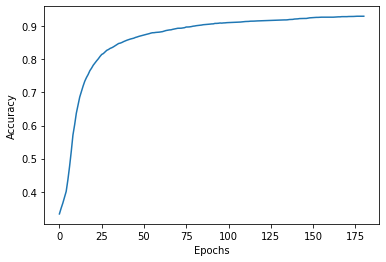

In [20]:
plt.plot(range(0,181), accuracy_matrix)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### Visualizing the Loss (cross-entropy) vs epochs

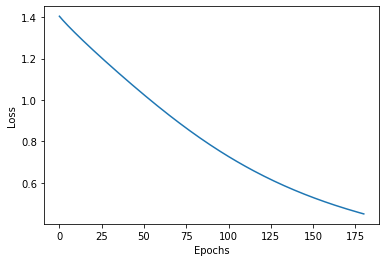

In [21]:
plt.plot(range(0,181), loss_matrix)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

It is observed that the accuracy increases exponenttially initially before gradually the curve becoming less steep . It plateaus at 93 percent around 175 epochs 

The loss function exponentially decreases with increasing number of epochs 

### Saving Weights to pickle file

In [22]:
file = open('weights', 'wb+')
pickle.dump(parameters, file)
file.close()

## References - 

1. https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd
2. https://mmuratarat.github.io/2019-02-25/xavier-glorot-he-weight-init